# 🛠 Employee Attrition Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import shap
import warnings

warnings.filterwarnings('ignore') # Ignore warnings for cleaner output
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset
try:
    df = pd.read_csv('employee_attrition_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'employee_attrition_dataset.csv' not found. Make sure the file is in the same directory.")
    exit()

Dataset loaded successfully.


In [3]:
print("\n--- Initial Data Inspection ---")
print("First 5 rows:")
print(df.head())


--- Initial Data Inspection ---
First 5 rows:
   Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0            1   58  Female        Married         IT    Manager          1   
1            2   48  Female        Married      Sales  Assistant          5   
2            3   34    Male        Married  Marketing  Assistant          1   
3            4   27  Female       Divorced  Marketing    Manager          1   
4            5   40    Male       Divorced  Marketing  Executive          1   

   Monthly_Income  Hourly_Rate  Years_at_Company  Years_in_Current_Role  \
0           15488           28                15                      4   
1           13079           28                 6                      9   
2           13744           24                24                     14   
3            6809           26                10                      8   
4           10206           52                29                     10   

   Years_Since_Last_Promoti

In [4]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int6

In [5]:
print("\nSummary Statistics (Numerical Features):")
print(df.describe())


Summary Statistics (Numerical Features):
       Employee_ID          Age    Job_Level  Monthly_Income  Hourly_Rate  \
count  1000.000000  1000.000000  1000.000000     1000.000000  1000.000000   
mean    500.500000    39.991000     3.055000    11499.899000    57.837000   
std     288.819436    11.780055     1.399977     4920.529231    24.702037   
min       1.000000    20.000000     1.000000     3001.000000    15.000000   
25%     250.750000    30.000000     2.000000     7395.750000    36.000000   
50%     500.500000    41.000000     3.000000    11256.000000    58.000000   
75%     750.250000    50.250000     4.000000    15855.000000    80.000000   
max    1000.000000    59.000000     5.000000    19999.000000    99.000000   

       Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  \
count       1000.000000            1000.000000                  1000.00000   
mean          14.922000               7.539000                     4.40800   
std            8.350548       

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64


In [7]:
print("\nTarget Variable Distribution (Attrition):")
print(df['Attrition'].value_counts(normalize=True))


Target Variable Distribution (Attrition):
Attrition
No     0.811
Yes    0.189
Name: proportion, dtype: float64


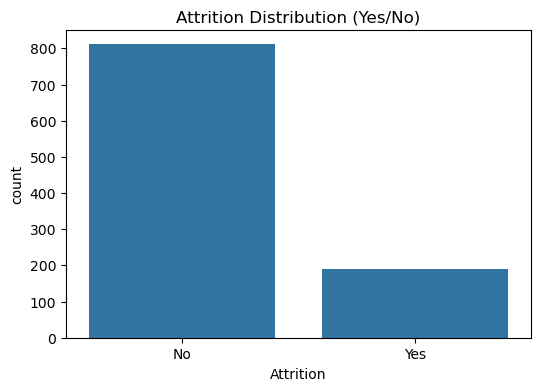

In [8]:
# 1. Attrition Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Distribution (Yes/No)')
plt.show()

In [9]:
# Map Attrition to numeric for easier calculations in EDA plots
df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

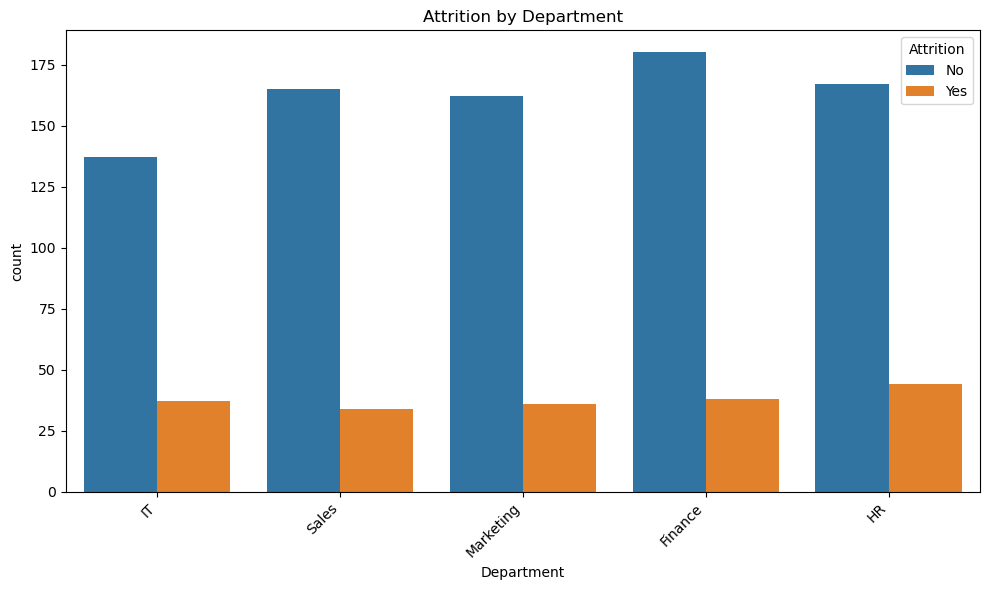

In [10]:
# 2. Attrition by Department
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
dept_attrition_rate = df.groupby('Department')['Attrition_Numeric'].mean().sort_values(ascending=False)
print("\nAttrition Rate by Department:")
print(dept_attrition_rate)


Attrition Rate by Department:
Department
IT           0.212644
HR           0.208531
Marketing    0.181818
Finance      0.174312
Sales        0.170854
Name: Attrition_Numeric, dtype: float64


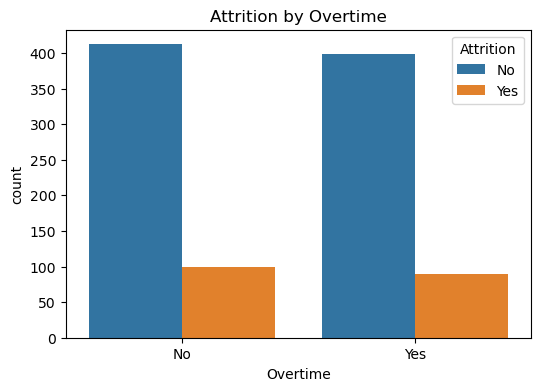

In [14]:
# 3. Attrition by Overtime
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Overtime', hue='Attrition')
plt.title('Attrition by Overtime')
plt.show()

In [15]:
overtime_attrition_rate = df.groupby('Overtime')['Attrition_Numeric'].mean().sort_values(ascending=False)
print("\nAttrition Rate by Overtime:")
print(overtime_attrition_rate)


Attrition Rate by Overtime:
Overtime
No     0.195312
Yes    0.182377
Name: Attrition_Numeric, dtype: float64


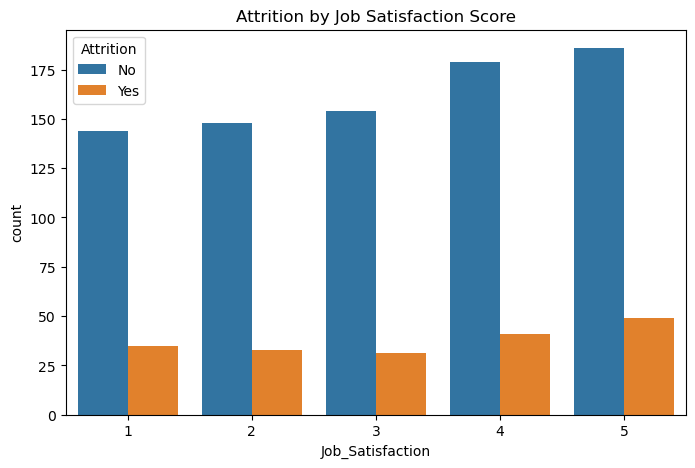

In [16]:
# 4. Attrition by Job Satisfaction
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Job_Satisfaction', hue='Attrition')
plt.title('Attrition by Job Satisfaction Score')
plt.show()

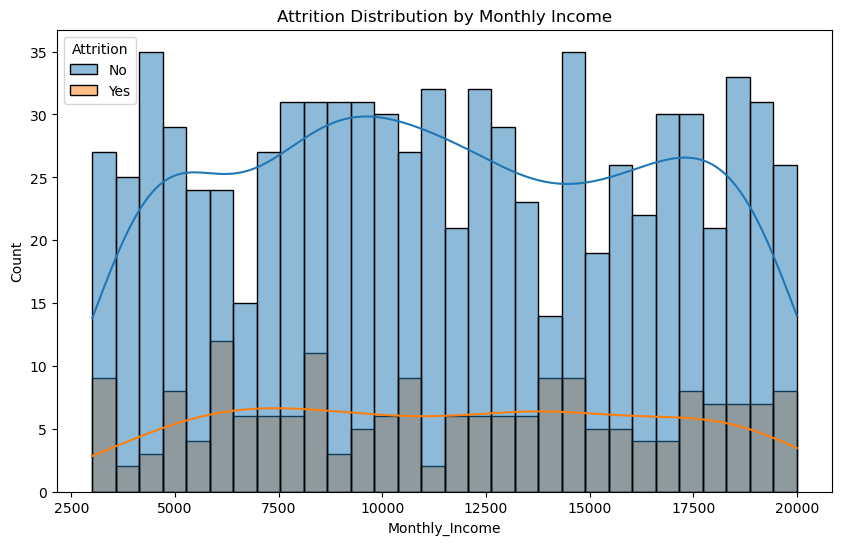

In [17]:
# 5. Attrition by Monthly Income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly_Income', hue='Attrition', kde=True, bins=30)
plt.title('Attrition Distribution by Monthly Income')
plt.show()

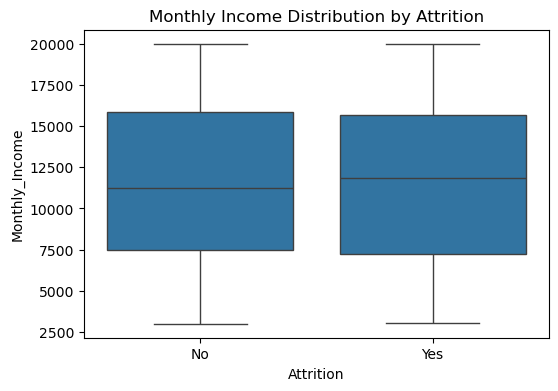

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Attrition', y='Monthly_Income')
plt.title('Monthly Income Distribution by Attrition')
plt.show()


Attrition Rate by Income Band (Quartiles):
Income_Band
Low          0.200
Medium       0.168
High         0.200
Very High    0.188
Name: Attrition_Numeric, dtype: float64


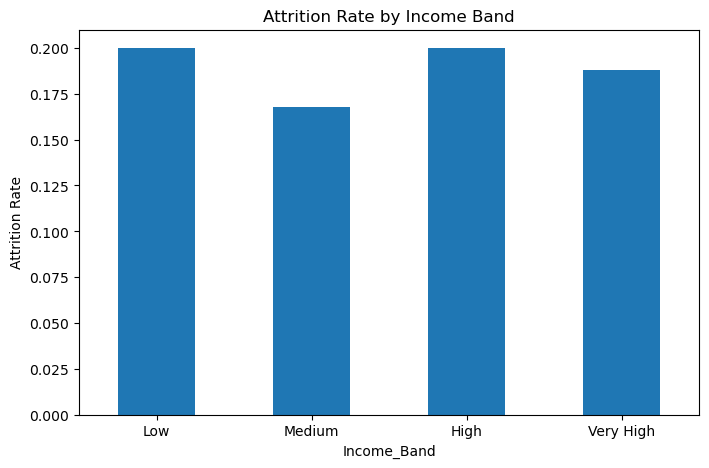

In [19]:
# 6. Salary Bands Analysis
try:
    df['Income_Band'] = pd.qcut(df['Monthly_Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    income_attrition_rate = df.groupby('Income_Band')['Attrition_Numeric'].mean()
    print("\nAttrition Rate by Income Band (Quartiles):")
    print(income_attrition_rate)

    plt.figure(figsize=(8, 5))
    income_attrition_rate.plot(kind='bar')
    plt.ylabel('Attrition Rate')
    plt.title('Attrition Rate by Income Band')
    plt.xticks(rotation=0)
    plt.show()
except ValueError as e:
    print(f"\nCould not create income bands due to non-unique bin edges: {e}")

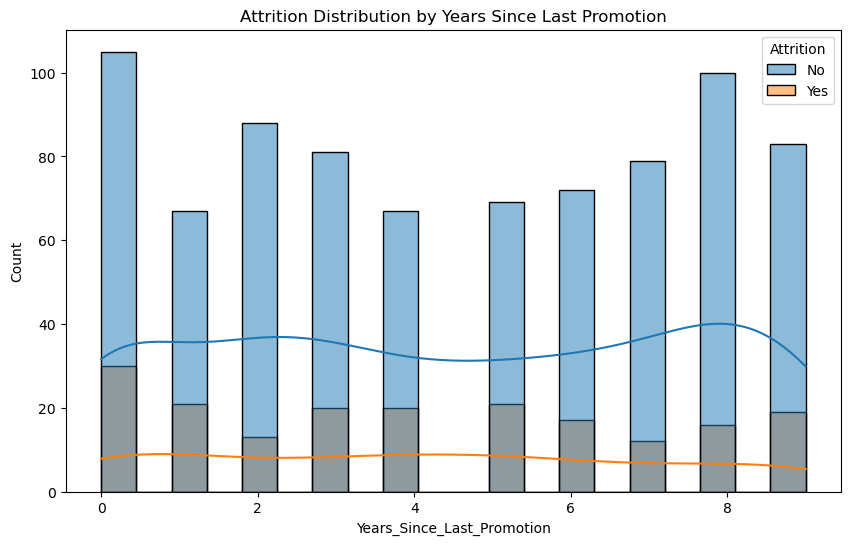

In [20]:
# 7. Attrition by Years Since Last Promotion
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Years_Since_Last_Promotion', hue='Attrition', kde=True, bins=20)
plt.title('Attrition Distribution by Years Since Last Promotion')
plt.show()

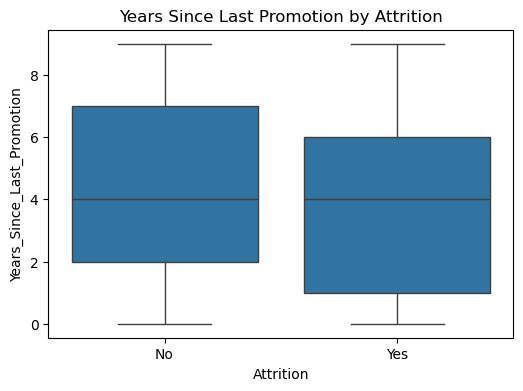

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Attrition', y='Years_Since_Last_Promotion')
plt.title('Years Since Last Promotion by Attrition')
plt.show()

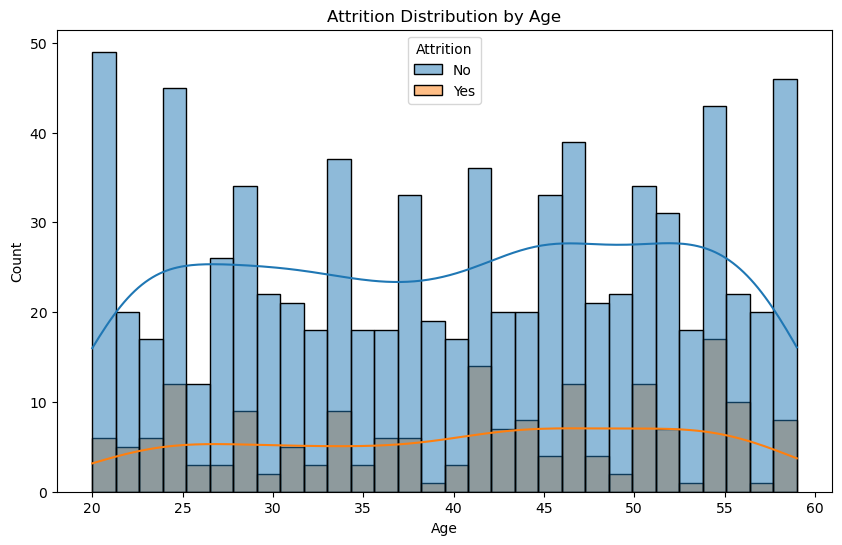

In [22]:
# 8. Attrition by Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=30)
plt.title('Attrition Distribution by Age')
plt.show()

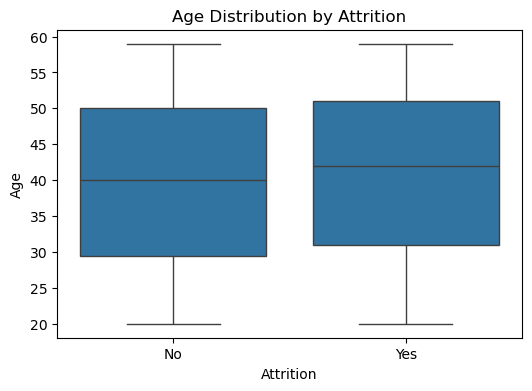

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Attrition', y='Age')
plt.title('Age Distribution by Attrition')
plt.show()

In [25]:
# Drop helper columns used only for EDA
df = df.drop(['Attrition_Numeric', 'Income_Band'], axis=1, errors='ignore')

In [26]:
# 1. Convert Target and Binary Features
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Overtime'] = df['Overtime'].apply(lambda x: 1 if x == 'Yes' else 0)
print("Converted 'Attrition' and 'Overtime' to numeric (1/0).")

Converted 'Attrition' and 'Overtime' to numeric (1/0).


In [27]:
# 2. Identify Categorical and Numerical Features (excluding target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Include Job_Level, Satisfaction etc. if treating as categorical - here we treat them as numeric
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Attrition') # Remove target
numerical_cols.remove('Employee_ID') # Remove ID
if 'Overtime' in numerical_cols: numerical_cols.remove('Overtime') # Already handled

print(f"\nCategorical columns for OneHotEncoding: {categorical_cols}")
# Manually treat ordinal features like Job_Level etc. as numerical for simplicity here
# If better performance is needed, consider OrdinalEncoder or OneHotEncoder for them too.


Categorical columns for OneHotEncoding: ['Gender', 'Marital_Status', 'Department', 'Job_Role']


In [28]:
# 3. One-Hot Encode Categorical Features
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Applied One-Hot Encoding.")

Applied One-Hot Encoding.


In [29]:
# 4. Drop Irrelevant Columns
df_processed = df_processed.drop(['Employee_ID'], axis=1)
print("Dropped 'Employee_ID'.")

Dropped 'Employee_ID'.


In [30]:
# 5. Split Data into Features (X) and Target (y)
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

In [31]:
# 6. Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Data split into Train ({X_train.shape[0]} samples) and Test ({X_test.shape[0]} samples).")

Data split into Train (750 samples) and Test (250 samples).


In [32]:
# 7. Feature Scaling (Numerical Features)
# Identify numerical columns *after* one-hot encoding (original numerics + overtime)
# Note: One-hot encoded columns are already 0/1, scaling isn't strictly needed but won't harm StandardScaler
# For simplicity, we scale all columns except the target.
numeric_cols_to_scale = X_train.columns # All features in X are now numeric or binary

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames (useful for SHAP)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Applied StandardScaler to features.")

Applied StandardScaler to features.



--- Logistic Regression ---
Accuracy: 0.5080

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.54      0.64       203
           1       0.16      0.38      0.23        47

    accuracy                           0.51       250
   macro avg       0.48      0.46      0.43       250
weighted avg       0.67      0.51      0.56       250



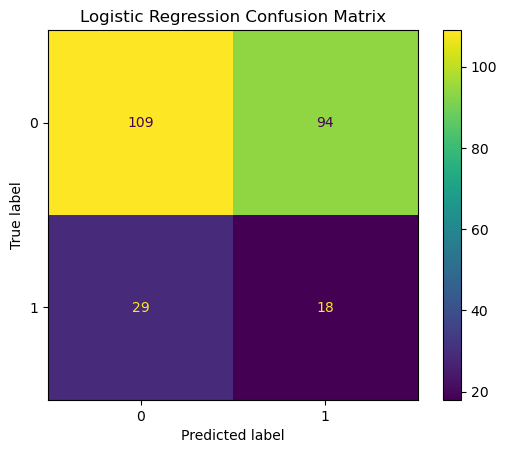

In [33]:
# 1. Logistic Regression
print("\n--- Logistic Regression ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced') # Added class_weight for imbalance
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


--- Decision Tree ---
Accuracy: 0.5240

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.53      0.64       203
           1       0.19      0.49      0.28        47

    accuracy                           0.52       250
   macro avg       0.51      0.51      0.46       250
weighted avg       0.70      0.52      0.58       250



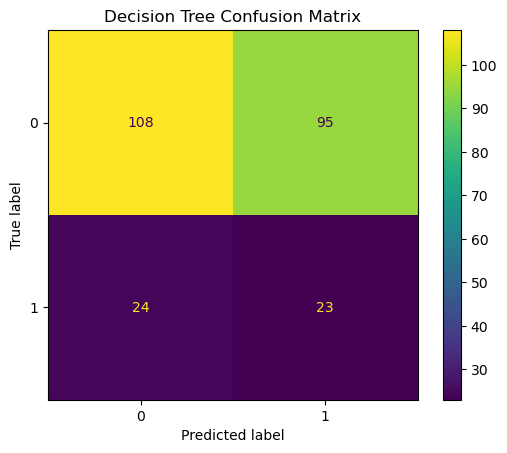

In [34]:
# 2. Decision Tree
print("\n--- Decision Tree ---")
# Start with a limited depth to prevent overfitting, can tune later
dtree = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced') # Added class_weight
dtree.fit(X_train_scaled, y_train)
y_pred_dtree = dtree.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_dtree):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtree))

cm_dtree = confusion_matrix(y_test, y_pred_dtree)
disp_dtree = ConfusionMatrixDisplay(confusion_matrix=cm_dtree)
disp_dtree.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

Generating SHAP summary plot...


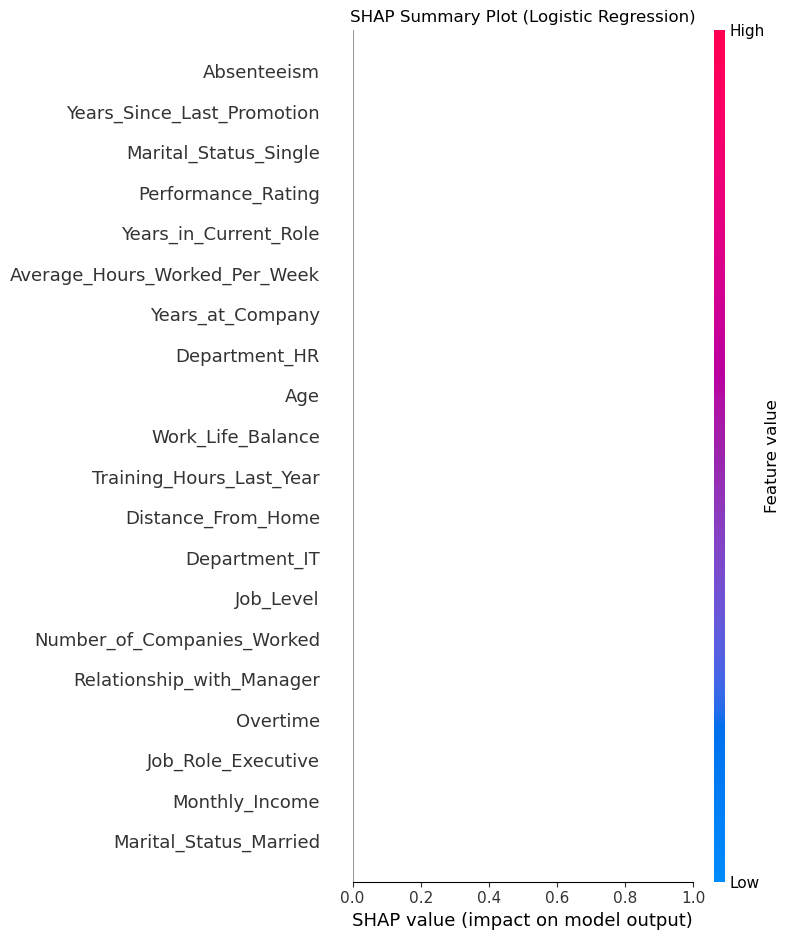


Generating SHAP dependence plot for 'Overtime'...


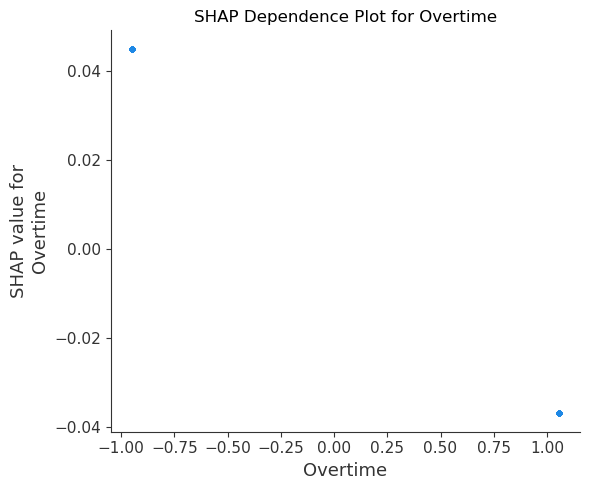

In [35]:
# Use KernelExplainer for Logistic Regression as LinearExplainer might behave unexpectedly
# with scaled data sometimes. KernelExplainer is more general but slower.
# For performance on larger datasets, LinearExplainer is preferred for linear models.
# Using LinearExplainer as it's generally appropriate for Logistic Regression
try:
    explainer = shap.LinearExplainer(log_reg, X_train_scaled) # Pass model and training data
    shap_values = explainer.shap_values(X_test_scaled) # Calculate SHAP values for test set

    print("Generating SHAP summary plot...")
    # Summary Plot (Feature Importance & Effect)
    shap.summary_plot(shap_values, X_test_scaled, plot_type="beeswarm", show=False)
    plt.title('SHAP Summary Plot (Logistic Regression)')
    plt.tight_layout()
    plt.show()

    # Dependence Plot Example (choose a feature with high importance from summary plot)
    # Find the exact column name after potential one-hot encoding if needed
    feature_to_plot = 'Overtime' # Example, make sure this column exists in X_test_scaled
    if feature_to_plot in X_test_scaled.columns:
        print(f"\nGenerating SHAP dependence plot for '{feature_to_plot}'...")
        shap.dependence_plot(feature_to_plot, shap_values, X_test_scaled, interaction_index=None, show=False)
        plt.title(f'SHAP Dependence Plot for {feature_to_plot}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Feature '{feature_to_plot}' not found in scaled test columns for dependence plot.")
        # Try finding another important feature based on the summary plot
        # Example: Find the first column name containing 'JobSatisfaction' if it was important
        try:
             important_feature = [col for col in X_test_scaled.columns if 'Job_Satisfaction' in col][0] # Example
             print(f"\nGenerating SHAP dependence plot for '{important_feature}'...")
             shap.dependence_plot(important_feature, shap_values, X_test_scaled, interaction_index=None, show=False)
             plt.title(f'SHAP Dependence Plot for {important_feature}')
             plt.tight_layout()
             plt.show()
        except IndexError:
             print("Could not automatically find an alternative feature for dependence plot.")


except Exception as e:
    print(f"An error occurred during SHAP analysis: {e}")
    print("Skipping SHAP visualization.")


1. SHAP Feature Importance (Mean Absolute Value)


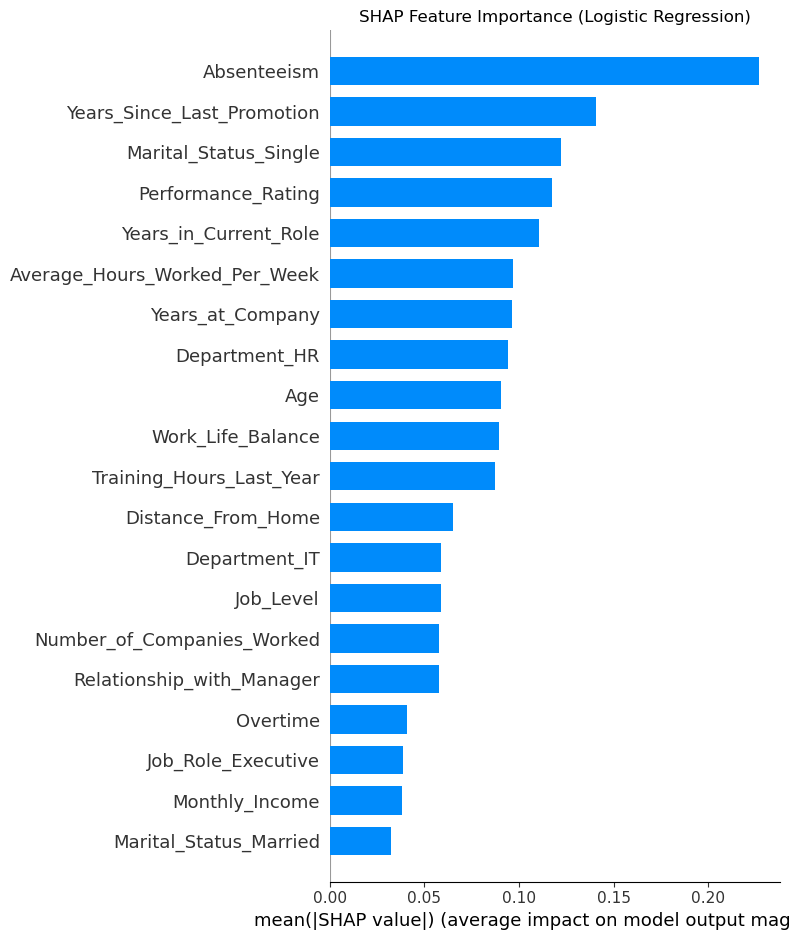

In [36]:
print("\n1. SHAP Feature Importance (Mean Absolute Value)")
try:
    shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", show=False)
    plt.title('SHAP Feature Importance (Logistic Regression)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error generating SHAP Bar Summary Plot: {e}")